In [1]:
# Import libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_ger = df[df['job_country'] == 'Germany'].copy()
df_ger['job_posted_month'] = df_ger['job_posted_date'].dt.strftime('%B')
df_ger_pivot = df_ger.pivot_table(index = 'job_posted_month', columns = 'job_title_short', aggfunc = 'size')
df_ger_pivot.reset_index(inplace = True)
df_ger_pivot['month_no'] = pd.to_datetime(df_ger_pivot['job_posted_month'], format='%B').dt.month
df_ger_pivot.sort_values('month_no', inplace = True)
df_ger_pivot.set_index('job_posted_month', inplace = True)
df_ger_pivot.drop(columns = 'month_no', inplace=True)
df_ger_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,11,596,622,759,39,128,239,205,52
February,49,11,593,571,611,35,131,199,171,60
March,43,3,582,511,529,18,86,199,157,42
April,47,13,454,432,520,17,93,190,146,20
May,45,7,430,364,351,16,81,123,111,29
June,31,7,558,434,430,22,92,137,138,30
July,46,7,545,474,438,25,105,143,125,50
August,28,9,489,399,407,30,86,145,141,48
September,106,24,656,668,583,41,126,178,137,66


In [7]:
df_ger_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col = 'job_posted_month')
df_ger_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [9]:
df_ger_merged = df_ger_pivot.merge(df_ger_software_pivot, on='job_posted_month')

In [15]:
top_5 = (df_ger_merged
.sum()
.sort_values(ascending = False)
.head(5)
.index
.tolist())
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Analyst']

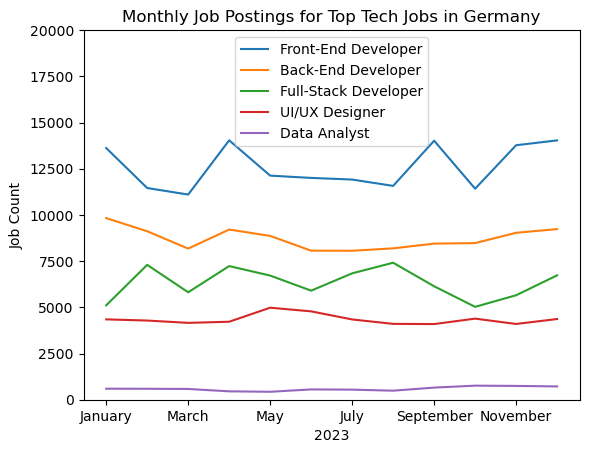

In [18]:
df_ger_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in Germany')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()

In [28]:
df['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
df_us_jobs = df[df['job_country'] == 'United States']
df_monthly_postings = df_us_jobs.groupby('job_posted_month').size().reset_index(name='postings_count')
merged_df = pd.merge(df_us_jobs, df_monthly_postings, on='job_posted_month', how='right')
merged_df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,22670
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,22670
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,22670
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,22670
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,22670


In [29]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023-03
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023-03
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",2023-03
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023-03


In [2]:
df_not_remote_jobs = df[df['job_work_from_home'] == False]

In [3]:
df_not_remote_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [4]:
df_not_remote_salary = df_not_remote_jobs.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc=['mean'])

In [5]:
df_not_remote_salary 

,mean
,salary_year_avg
job_title_short,
Business Analyst,90177.419940
Cloud Engineer,105508.026786
Data Analyst,93754.956809
Data Engineer,129747.517613
Data Scientist,134405.937420
Machine Learning Engineer,125163.597015
Senior Data Analyst,114051.799273
Senior Data Engineer,145330.070790


In [6]:
df_not_remote_salary.columns = ["salary_not_remote_avg"]
df_not_remote_salary 

,salary_not_remote_avg
job_title_short,
Business Analyst,90177.419940
Cloud Engineer,105508.026786
Data Analyst,93754.956809
Data Engineer,129747.517613
Data Scientist,134405.937420
Machine Learning Engineer,125163.597015
Senior Data Analyst,114051.799273
Senior Data Engineer,145330.070790
Senior Data Scientist,151774.688222


In [7]:
merged_task2 = pd.merge(df_not_remote_jobs, df_not_remote_salary, on = 'job_title_short', how = 'right')
merged_task2.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_not_remote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",90177.41994


In [8]:
#df_not_remote_jobs = df[df['job_work_from_home'] == False]
#df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean().reset_index()
#df_not_remote_salary.rename(columns={'salary_year_avg': 'salary_not_remote_avg'}, inplace=True)
#merged_df = pd.merge(df_not_remote_jobs, df_not_remote_salary, on='job_title_short', how='right')

In [7]:
df_company_salary = df.groupby(by = ['company_name'])['salary_year_avg'].mean().reset_index()
df_company_salary

,company_name,salary_year_avg
0,"""Dbank""",NaN
1,"""Hamkorbank"" АТБ",NaN
2,"""KELKOO""",NaN
3,"""PASHA Holding"" LLC",NaN
4,"""TECHNICUS LTD"" sp. z o.o. ODDZIAŁ W POLSCE",NaN
...,...,...
139977,𝐏𝐓 𝐌𝐢𝐭𝐫𝐚 𝐏𝐢𝐧𝐚𝐬𝐭𝐡𝐢𝐤𝐚 𝐌𝐮𝐬𝐭𝐢𝐤𝐚 𝐑𝐞𝐧𝐭 (𝐌𝐏𝐌 𝐑𝐞𝐧𝐭),NaN
139978,🇮🇳 easyfix.in,NaN
139979,🏛️WalletConnect,NaN
139980,💻 LGA IT,NaN


In [8]:
df_company_remote = df[df['job_work_from_home'] == True].groupby('company_name').size().reset_index(name='remote_count')
merged_df = pd.merge(df_company_salary, df_company_remote, on='company_name', how='inner')
merged_df.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1
